# RESULTADOS

### Contexto
Ecobici es un sistema de bicicletas compartidas 
lanzado en febrero de 2010 por el gobierno de la 
Ciudad de México para la realización de viajes de 
corta distancia y duración a precios reducidos o de forma gratuita. 

### Datos

A través de la librería de Pandas vamos a leer 
los archivos .csv para posteriormente guardarlos 
en un formato de DataFrame.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time 
import datetime


stations = pd.read_csv('stations.csv')
agosto = pd.read_csv('2019-08.csv')
septiembre = pd.read_csv('2019-09.csv')
octubre = pd.read_csv('2019-10.csv')

C:\Users\osiri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [88]:
def arribos_por_hora(fecha):
    
    frames = [agosto, septiembre, octubre]
    viajes = pd.concat(frames)
    dia = viajes[viajes['Fecha_Arribo'] == fecha]
    hours = []
    
    for i in dia['Hora_Arribo'].values:
        pt = datetime.datetime.strptime(i,'%H:%M:%S')
        hours.append(pt.hour)
        
    return hours

In [89]:
semana_agosto = ['05/08/2019',
                  '06/08/2019',
                  '07/08/2019',
                  '08/08/2019',
                  '09/08/2019',
                  '10/08/2019',
                  '11/08/2019']

semana_ = ['Lunes',
           'Martes',
           'Miercoles',
           'Jueves',
           'Viernes',
           'Sábado',
           'Domingo']

In [90]:
def trazar_resultados(semana):
    plt.figure(figsize = (10,15))
    for i in range(len(semana)):
        plt.subplot(len(semana),1,i+1)  
        arribo_hora =  pd.Series(arribos_por_hora(semana[i])).value_counts()
        arribo_hora.sort_index().plot(label='Arribos por hora')
        horas = list(pd.Series(arribo_hora.sort_index().index))
        pico = pd.Series(arribos_por_hora(semana[i])).value_counts().values[0]
        pico_lista = pico*np.ones(len(horas))
        hora_pico = list(pd.Series(arribos_por_hora(semana[i])).value_counts().index)[0]
        plt.plot(horas,pico_lista, ':b', label=str(pico)+ ' '+ 'arribos')
        plt.plot(hora_pico,pico, '*r', label='hora pico a las ' + str(hora_pico)+' '+'hrs.')
        plt.title(semana_[i] + ' ' + semana[i])
        plt.ylim(0,4000)
        plt.ylabel('Arribos por Hora')
        plt.legend()
        plt.grid()

    plt.xlabel('Horas')
    plt.subplots_adjust(hspace=0.5)
    plt.show()

### ¿Cómo se comporta el arribo de viajes por horas del día y por estaciones? 

#### ● ¿Cual es la hora ‘pico’ del servicio?

Realizando una exploración de datos de los arribos por una semana 
de cada mes, se aprecia que el comportamiento en agosto
a las horas pico perduran a las 18:00 hrs 
de lunes a jueves, los viernes a las 8:00 y los fines de semana sábado 
14:00 hrs y domingo 13:00.

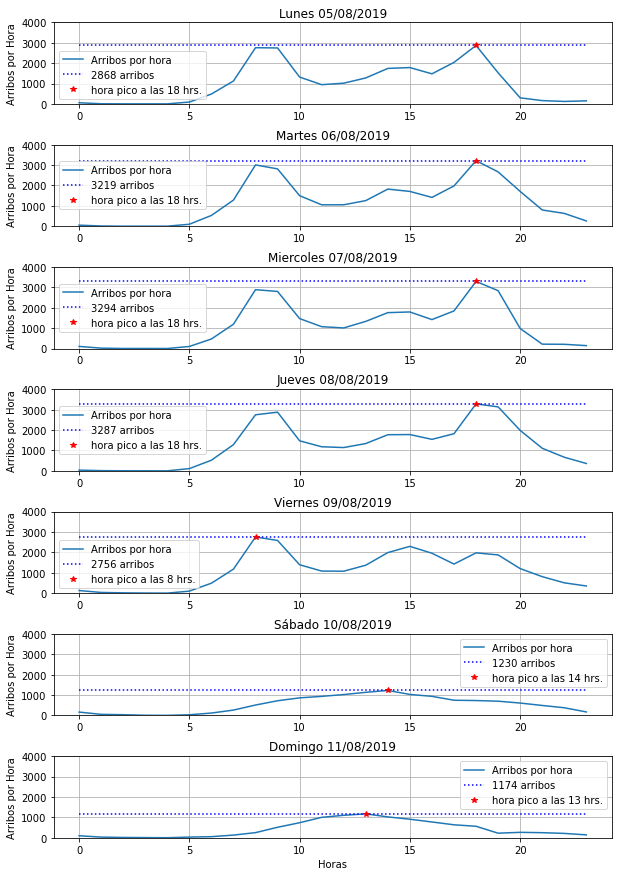

In [91]:
trazar_resultados(semana_agosto)

In [92]:
semana_septiembre = ['09/09/2019',
                     '10/09/2019',
                     '11/09/2019',
                     '12/09/2019',
                     '13/09/2019',
                     '14/09/2019',
                     '15/09/2019']

Para una semana de septiembre se encontró que la hora pico 
se mantuvo a las 8:00 hrs.

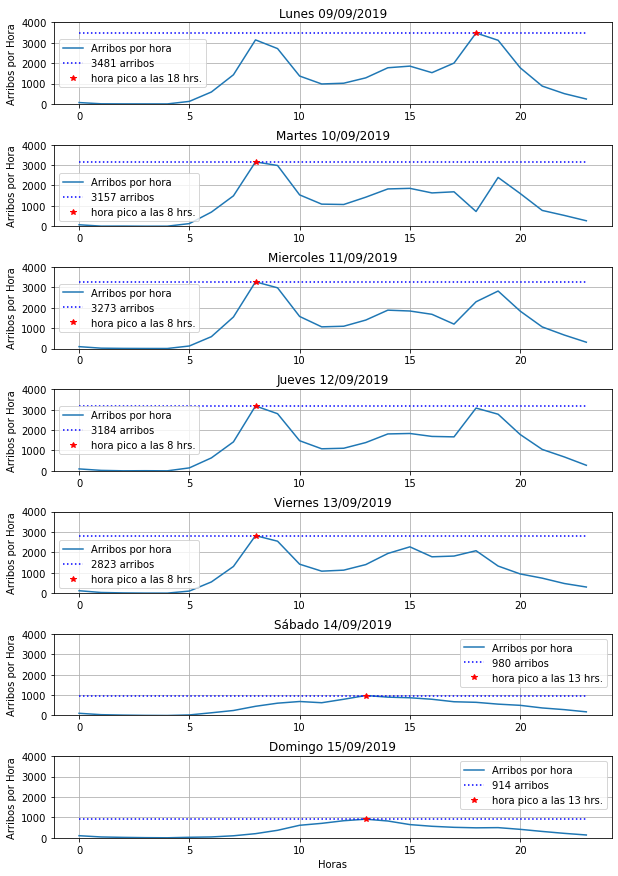

In [93]:
trazar_resultados(semana_septiembre)

In [94]:
semana_octubre = ['21/10/2019',
                  '22/10/2019',
                  '23/10/2019',
                  '24/10/2019',
                  '25/10/2019',
                  '26/10/2019',
                  '27/10/2019']

Al igual para una semana de octubre hubo una 
demanda mas temprana del servicio a las 8:00 hrs.

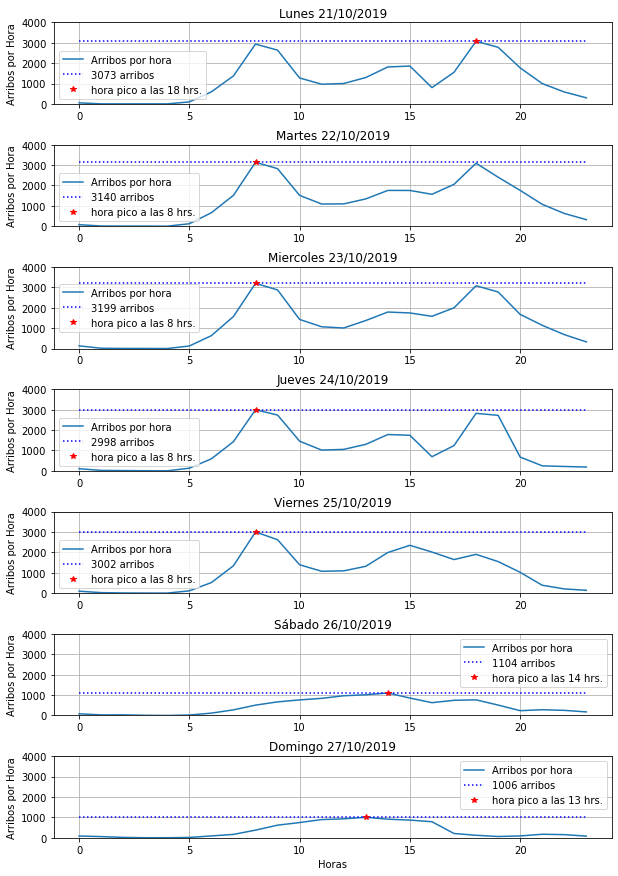

In [95]:
trazar_resultados(semana_octubre)

Partiendo de lo anterior se presentan a continuación las horas pico
por cada mes en el cual hubo una demanda en la cual inicialmente en 
agosto perduró a las 18:00 hrs y se mantuvo más temprano a las 8:00 hrs 
para los dos meses posteriores.

In [96]:
mes = ['Agosto', 'Septiembre', 'Octubre']
frames = [agosto, septiembre, octubre]

def horas_pico_por_mes(mes, frame):
    
    fechas = list(frame['Fecha_Arribo'].unique())
    hora_pico_lista = []
    
    for i in range(len(fechas)):
        hora_pico = list(pd.Series(arribos_por_hora(fechas[i])).value_counts().index)[0]
        hora_pico_lista.append(hora_pico)
        
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.barh(fechas,hora_pico_lista)
    label = hora_pico_lista
    for i in range(len(label)):
        plt.text(x=label[i] , y=fechas[i] ,s = label[i], size = 6)
    ax.set_yticks(fechas)
    ax.set_yticklabels(fechas)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Horas')
    ax.set_title('Horas "pico" en el mes de ' + " " + mes)
    plt.grid()
    plt.show()

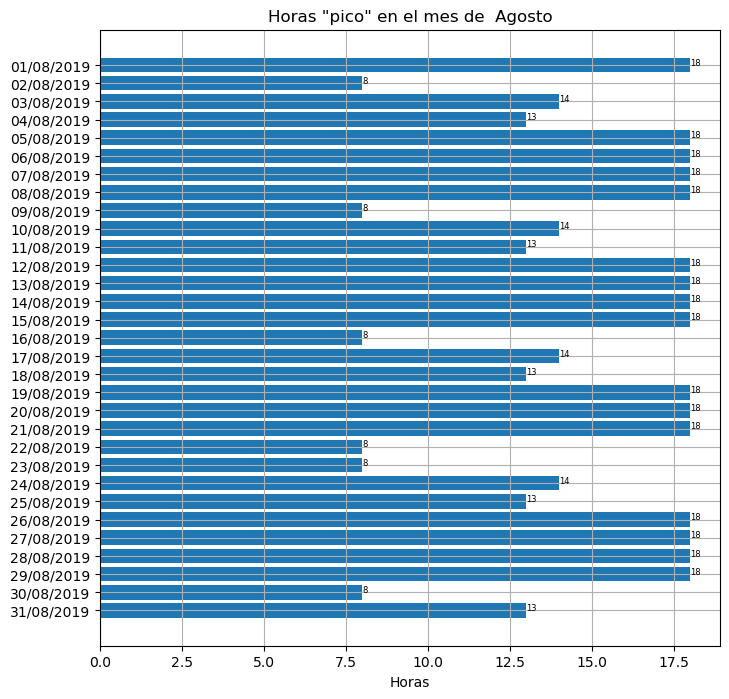

In [97]:
horas_pico_por_mes(mes[0],frames[0])

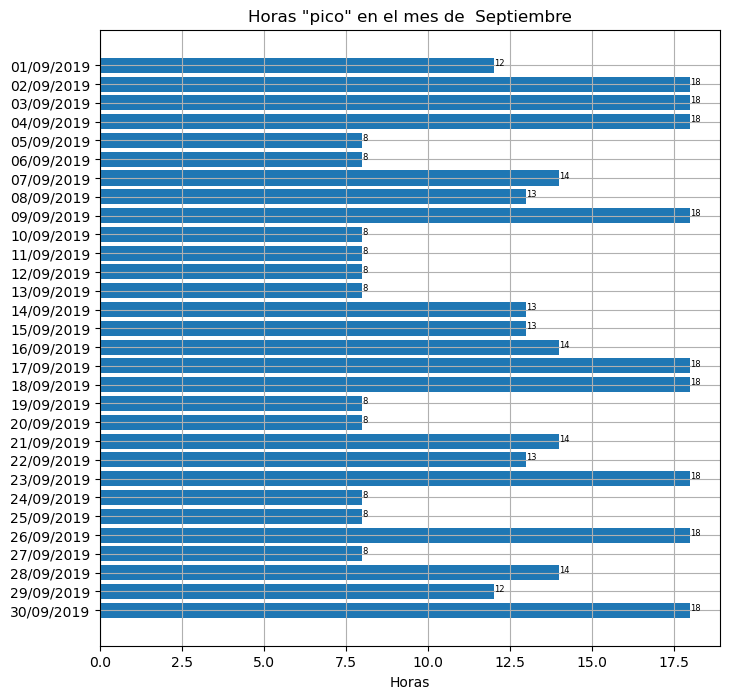

In [98]:
horas_pico_por_mes(mes[1],frames[1])

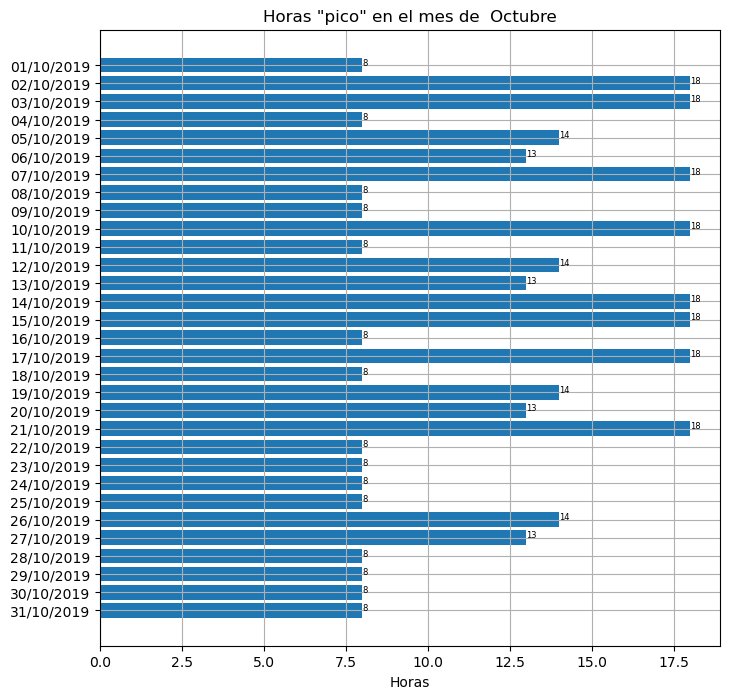

In [99]:
horas_pico_por_mes(mes[2],frames[2])

#### ● ¿Cuál es la estación con más viajes? ¿y la que tiene menos viajes?

In [100]:
frames = [agosto, septiembre, octubre]
viajes = pd.concat(frames)
arribos_estaciones = viajes['Ciclo_Estacion_Arribo'].value_counts()

In [101]:
arribos_estaciones

266     24957
27      19979
1       19356
271     15641
64      15402
        ...  
113        28
3000       22
1001       13
3002        7
3001        4
Name: Ciclo_Estacion_Arribo, Length: 483, dtype: int64

La estación con mayor número de arribos es la 266 con 24957

In [102]:
print(arribos_estaciones.values[0])
print(arribos_estaciones.index[0])

24957
266


La estación con menor número de arribos es la 3001 con 4

In [103]:
print(arribos_estaciones.values[len(arribos_estaciones)-1])
print(arribos_estaciones.index[len(arribos_estaciones)-1])

4
3001


### ● Tendencia de estaciones. Considerando los viajes de los tres meses ¿qué estaciones han incrementado más su demanda (un top 3 es suficiente) y cuales han descendido en demanda (top 3)?

La metodología empleada para pronosticar el aumento o descenso de la demanda 
fue a través de la de la regresión lineal, el cual nos permite a través de la pendiente
de la linea para estimar el aumento o descenso de manera porcentual.

In [104]:
estaciones = np.sort(viajes['Ciclo_Estacion_Retiro'].unique())

In [105]:
from sklearn import linear_model

def medir_demanda(n):
    retiros_por_estacion = viajes[viajes['Ciclo_Estacion_Retiro'] == n]
    fechas_3_meses = retiros_por_estacion['Fecha_Retiro'].unique()
    dict_retiros = retiros_por_estacion['Fecha_Retiro'].value_counts().to_dict()
    retiros = [] 
    for i in range(len(fechas_3_meses)):
        retiros.append(dict_retiros[fechas_3_meses[i]])
    serie = pd.Series(retiros, index=fechas_3_meses)
    x = np.array(pd.Series(retiros).index)
    x = x.reshape(-1,1)
    y = np.array(pd.Series(retiros).values)
    y = y.reshape(-1,1)
    
    reg = linear_model.LinearRegression()
    reg.fit(x,y)
    a = reg.coef_
    b = reg.intercept_
    yp = a*x+b
    return serie, x, y, a, b, yp

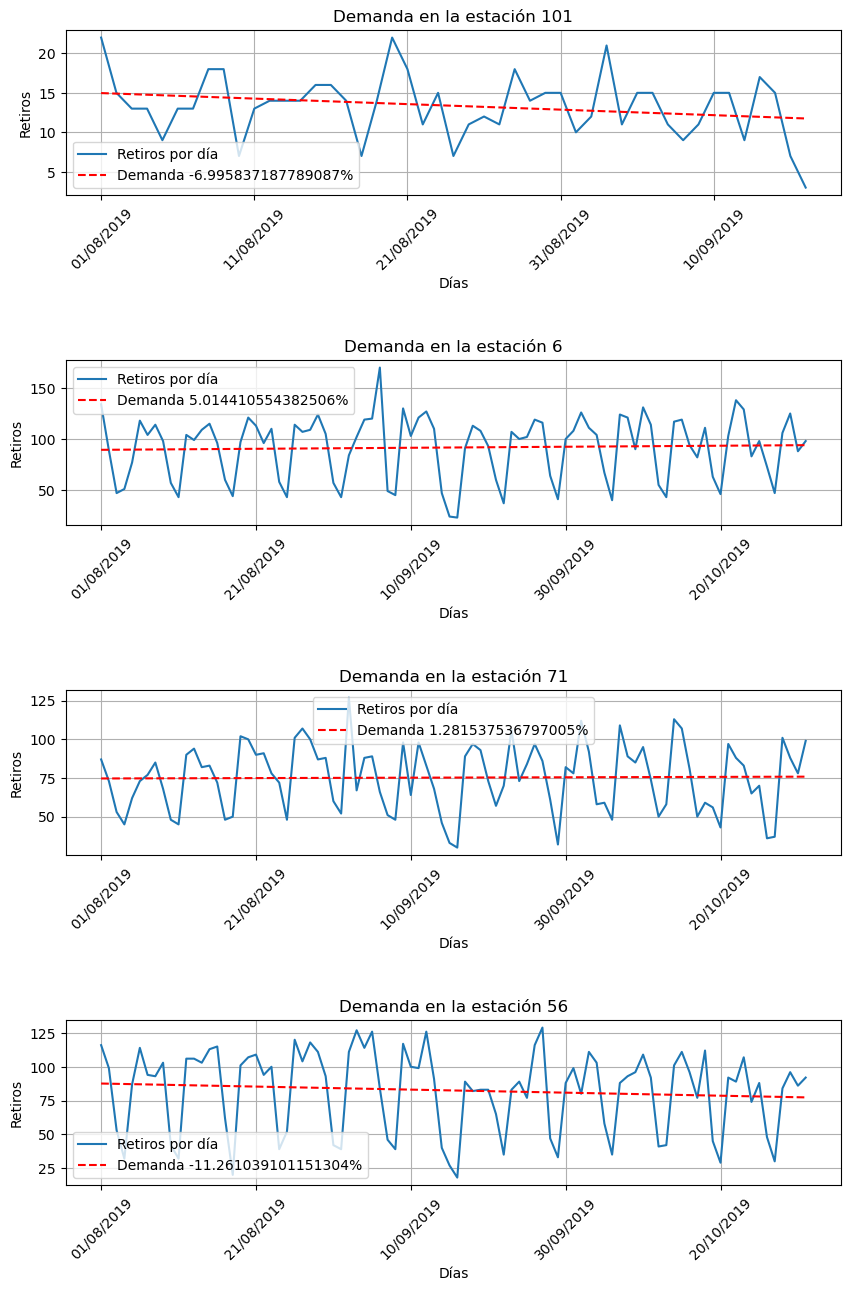

In [106]:
plt.figure(figsize = (10,15))
serie, x, y, a, b, yp = medir_demanda(estaciones[100])
plt.subplot(4,1,1)
serie.plot(label='Retiros por día')
plt.plot(x,yp, '--r', label='Demanda ' + str(a[0][0]*100) + '%')   
plt.title('Demanda en la estación '+ str(estaciones[100]))
plt.xlabel('Días')
plt.ylabel('Retiros')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

serie, x, y, a, b, yp = medir_demanda(estaciones[5])
plt.subplot(4,1,2)
serie.plot(label='Retiros por día')
plt.plot(x,yp, '--r', label='Demanda ' + str(a[0][0]*100) + '%')   
plt.title('Demanda en la estación '+ str(estaciones[5]))
plt.xlabel('Días')
plt.ylabel('Retiros')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

serie, x, y, a, b, yp = medir_demanda(estaciones[70])
plt.subplot(4,1,3)
serie.plot(label='Retiros por día')
plt.plot(x,yp, '--r', label='Demanda ' + str(a[0][0]*100) + '%')   
plt.title('Demanda en la estación '+ str(estaciones[70]))
plt.xlabel('Días')
plt.ylabel('Retiros')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

serie, x, y, a, b, yp = medir_demanda(estaciones[55])
plt.subplot(4,1,4)
serie.plot(label='Retiros por día')
plt.plot(x,yp, '--r', label='Demanda ' + str(a[0][0]*100) + '%')   
plt.title('Demanda en la estación '+ str(estaciones[55]))
plt.xlabel('Días')
plt.ylabel('Retiros')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.subplots_adjust(hspace=1)
plt.legend()
plt.show()

In [107]:
demanda = []
for i in range(len(estaciones)):
    serie, x, y, a, b, yp = medir_demanda(estaciones[i])
    demanda.append(a[0][0])

In [108]:
demanda_por_st = pd.Series(demanda, index=estaciones).sort_values(ascending=False)

Las estaciones con mayor demanda en el servicio fueron la 1001, 29 y 16 (de mayor a menor).

In [109]:
demanda_por_st[:3]

1001    1.500000
29      0.347316
16      0.303695
dtype: float64

In [134]:
demanda_por_st

1001    1.500000
29      0.347316
16      0.303695
242     0.278998
28      0.182776
          ...   
38     -0.248255
52     -0.266433
66     -0.282069
271    -0.337954
41     -0.429431
Length: 483, dtype: float64

Las estaciones con menor demanda en el servicio fueron la 41, 271 y 66 (de menor a mayor).

In [110]:
demanda_por_st[len(demanda_por_st)-3:len(demanda_por_st)]

66    -0.282069
271   -0.337954
41    -0.429431
dtype: float64

## ● ¿Qué relación existe entre los retiros y arribos entre estaciones?

Para poder medir relacion entre los retiros y arribos se utilizó una
matriz de correlacion lineal.

Se separa los arribos

In [111]:
frames = [agosto, septiembre, octubre]
viajes = pd.concat(frames)
arribos_estaciones = viajes['Ciclo_Estacion_Arribo'].value_counts()
arribos_estaciones = arribos_estaciones.sort_index()
arribos_estaciones

1       19356
2        6350
3        6212
4        6509
5        6899
        ...  
1001       13
1002      187
3000       22
3001        4
3002        7
Name: Ciclo_Estacion_Arribo, Length: 483, dtype: int64

Se separa los retiros

In [112]:
retiros_estaciones = viajes['Ciclo_Estacion_Retiro'].value_counts()
retiros_estaciones = retiros_estaciones.sort_index()
retiros_estaciones

1       18478
2        6503
3        6851
4        5742
5        6501
        ...  
1001       13
1002        1
3000        6
3001        2
3002        3
Name: Ciclo_Estacion_Retiro, Length: 483, dtype: int64

Con ambas series contruidas se crean dos atributos

In [113]:
servicio = pd.DataFrame({'Retiros' : retiros_estaciones, 
                        'Arribos' : arribos_estaciones})
servicio

,Retiros,Arribos
1,18478,19356
2,6503,6350
3,6851,6212
4,5742,6509
5,6501,6899
...,...,...
1001,13,13
1002,1,187
3000,6,22
3001,2,4


Con ambos atributos se crear la matriz de correlación

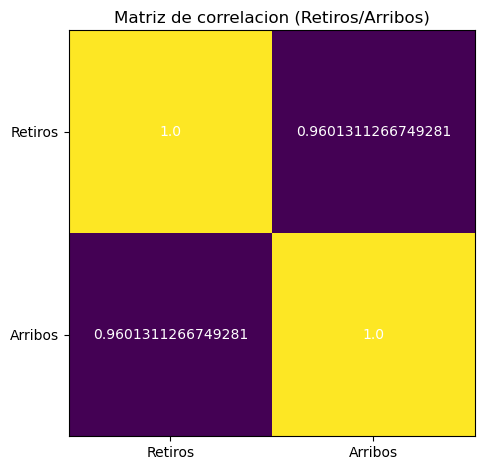

In [114]:
corrMatt = servicio[["Retiros","Arribos"]].corr()
mask = np.array(corrMatt)

fig, ax = plt.subplots()
im = ax.imshow(mask)
mov = ["Retiros","Arribos"]
ax.set_xticks(np.arange(len(mov)))
ax.set_yticks(np.arange(len(mov)))
ax.set_xticklabels(mov)
ax.set_yticklabels(mov)

for i in range(len(mov)):
    for j in range(len(mov)):
        text = ax.text(j, i, mask[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Matriz de correlacion (Retiros/Arribos)")
fig.tight_layout()

plt.show()

Entonces existe una alta correlación con un valor del 96%.

### ● Realiza una segmentación de las estaciones. La segmentación puede ser del número de bicis, del número de viajes, o de cualquier factor que creas relevante. Lo importante es la explicación del por qué se hizo esa segmentación, cómo se hizo y por qué pudiera ser valiosa o interesante esta segmentación.

Exploramos nuestros set de datos de viajes

In [115]:
viajes

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,24,8256,52,01/08/2019,0:00:18,269,01/08/2019,0:07:30
1,M,26,9439,125,01/08/2019,0:00:34,127,01/08/2019,0:10:03
2,M,26,12414,34,01/08/2019,0:02:27,59,01/08/2019,0:10:26
3,M,38,15048,108,01/08/2019,0:03:13,260,01/08/2019,0:07:42
4,F,32,2404,133,01/08/2019,0:06:45,465,01/08/2019,0:53:20
...,...,...,...,...,...,...,...,...,...
740994,M,29,9913,27,30/10/2019,23:57:23,1,31/10/2019,00:02:15
740995,M,28,7969,142,30/10/2019,23:57:32,286,31/10/2019,00:17:22
740996,M,23,2912,425,30/10/2019,23:58:37,324,31/10/2019,00:07:10
740997,M,33,7301,58,30/10/2019,23:58:37,168,31/10/2019,00:27:48


Separamos los valores de horas de arribo y de retiro

In [116]:
retiro = viajes['Hora_Retiro'].values
arribo = viajes['Hora_Arribo'].values

Luego tranformaremos estos arreglos para poder contenerlos en una sola columna de duracion de viajes

In [117]:
def date_trans_array(value):
    date2array = []
    for i in value:
        pt = datetime.datetime.strptime(i,'%H:%M:%S')
        date2array.append(pt.minute + pt.second/60)
    return date2array

In [118]:
retiro_ = date_trans_array(retiro)
arribo_ = date_trans_array(arribo)

In [119]:
def temporizar(r,a):
    resultados = []   
    for i in range(len(r)):
        if a[i] > r[i]:
            result = abs(a[i] - r[i])
        elif a[i] < r[i]:
            result = a[i] + r[i]
            result = abs(result - 60)
        else: result = 0
        resultados.append(result)
            
    return resultados

In [120]:
t = temporizar(retiro_, arribo_)

● Describe qué técnica y variables utilizaste y por que, también debes de dar una interpretación a cada perfil que definas y justificar el número de perfiles que encuentres.

Se crea un nuevo set de datos con atributos de edad y duración de los viajes. Se consideró esta elección ya que lo que queremos descubrir es como categorizar el comportamiento de los usuarios de acuerdo al uso del servicio de ECOBICI.

In [121]:
duracion = pd.Series(t).values
edad = viajes['Edad_Usuario'].values
dataset = pd.DataFrame({'Edad_Usuario': edad, 
                        'Duracion_Viaje': duracion})
dataset

,Edad_Usuario,Duracion_Viaje
0,24,7.200000
1,26,9.483333
2,26,7.983333
3,38,4.483333
4,32,46.583333
...,...,...
2163519,29,0.366667
2163520,28,14.900000
2163521,23,5.783333
2163522,33,26.416667


Se eealiza el preprocesamientos de los datos a travpes de la eliminación de valores duplicados y valores nulos (si lo hay).

In [122]:
dataset[dataset.duplicated()]

,Edad_Usuario,Duracion_Viaje
584,36,7.083333
641,27,9.566667
750,26,3.000000
794,25,7.233333
874,31,10.000000
...,...,...
2163518,28,3.950000
2163519,29,0.366667
2163520,28,14.900000
2163521,23,5.783333


In [123]:
dataset.isna().sum()

Edad_Usuario      0
Duracion_Viaje    0
dtype: int64

In [124]:
dataset = dataset.drop_duplicates()
dataset

,Edad_Usuario,Duracion_Viaje
0,24,7.200000
1,26,9.483333
2,26,7.983333
3,38,4.483333
4,32,46.583333
...,...,...
2163479,31,58.433333
2163480,50,53.333333
2163489,35,43.316667
2163496,42,41.500000


Luego se observa el comportamiento de los datos, donde la moda de la edad se sitúa entre los 25 y los 30 años. Por otro lado la moda del tiempo de uso del servicio se encuentra cercana a 10 min.

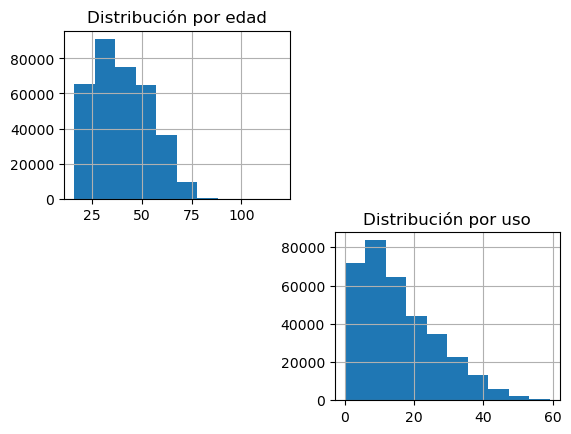

In [125]:
plt.subplot(2,2,1)
dataset['Edad_Usuario'].hist()
plt.title('Distribución por edad')
plt.subplot(2,2,4)
plt.title('Distribución por uso')
dataset['Duracion_Viaje'].hist()
plt.show()

Se visualiza el set de datos con muestras asignadas por el usuario ya que contamos con centenas de miles de datos.

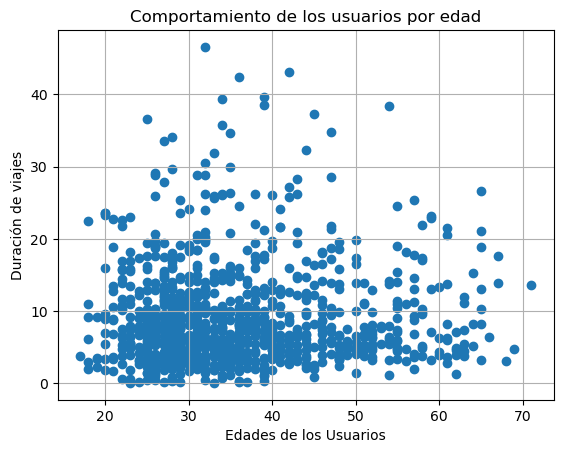

In [126]:
data_points = 1000 # Ingrese un valor menor a 343675
X = dataset['Edad_Usuario'].values[0:data_points]
Y = dataset['Duracion_Viaje'].values[0:data_points]
plt.title('Comportamiento de los usuarios por edad')
plt.xlabel('Edades de los Usuarios')
plt.ylabel('Duración de viajes')
plt.scatter(X,Y)
plt.grid()
plt.show()

La técnica que se realizará es Clustering a través de K-medias, con esto le pediremos al algoritmo que nos segmente a los usuarios de acuerdo al uso que se les da en las estaciones.

In [127]:
from sklearn.cluster import KMeans

Le pediremos al algoritmo que nos segmente en 5 clusters de tipos de usuario para poder inferir hacia que tipo de usuario se clasificaría nuevos datos desconocidos.

In [128]:
km = KMeans(n_clusters=5, n_init=100, max_iter=1000, init='random')
preds = km.fit_predict(dataset)

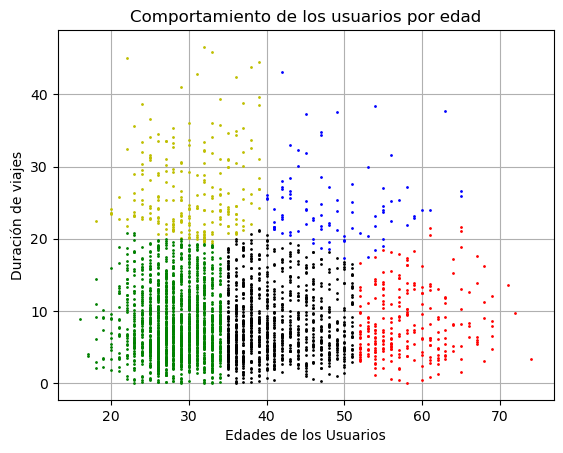

In [129]:
data_points = 3000 # Ingrese un valor menor a 343675
X = dataset['Edad_Usuario'].values[0:data_points]
Y = dataset['Duracion_Viaje'].values[0:data_points]
plt.title('Comportamiento de los usuarios por edad')
plt.xlabel('Edades de los Usuarios')
plt.ylabel('Duración de viajes')
color = ['r','g','b','k','y']
for i in range(len(preds[0:data_points])):
    plt.scatter(X[i],Y[i], s=1, linewidths=1,
                color=color[preds[i]], zorder=10)
plt.grid()
plt.show()

In [130]:
pd.Series(preds).value_counts()

#0 - rojo
#1 - verde
#2 - azul
#3 - negro
#4 - amarillo

1    92486
3    84158
0    62903
4    62648
2    41480
dtype: int64

Gracias a este modelo podemos encontrar los clusteres, donde los usuarios mas comunes tienen edad de 20 a 35 años y que su duración de viajes es mas comun con menos de 20 min. 
Asi que el cluster con menos usuarios comprender en una edad de 40 a 60 años cuyos viajes son aproximadamente mayores a los 18 min.

### ● Utiliza la información georreferenciada de las estaciones para crear una visualización en un mapa. En este inciso puedes incluir la información extra que desees.

In [131]:
stations

,id,lat,lon,name
0,1,19.433571,-99.167809,1 RIO SENA-RIO BALSAS
1,2,19.431386,-99.171695,2 RIO GUADALQUIVIR-RIO BALSAS
2,3,19.431655,-99.158668,3 REFORMA-INSURGENTES
3,4,19.428309,-99.171713,4 RIO NILO-RIO PANUCO
4,5,19.429720,-99.169363,5 RIO PANUCO-RIO TIBER
...,...,...,...,...
475,476,19.442127,-99.184433,476 LAGO COMO-LAGUNA DE MAYRÁN
476,477,19.440905,-99.181743,477 LAGO ISEO-LAGUNA DE MAYRÁN
477,478,19.440818,-99.176961,478 LAGUNA DE MAYRÁN-LAGO CHALCO
478,479,19.444433,-99.179664,E479 LAGO MURITZ-AV. MARINA NACIONAL


In [132]:
map_ = folium.Map(location=[stations.iloc[0, 1], stations.iloc[0, 2]], zoom_start=12)

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors


for lat, lng, name in zip(
                         stations['lat'],
                         stations['lon'],
                         stations['name']):
    label = folium.Popup('{}'.format(name))
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup= label,
        color='r',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.9,
        parse_html=False).add_to(map_)

In [133]:
map_ 

### ● ¿Cómo utilizarías  tu análisis y segmentación para mejorar el servicio de ECOBICI?

Gracias al análisis descriptivo y predictivo que se llevo a cabo podemos tomar mejores decisiones para los usuarios, los cuales, podemos inferir en que estaciones es probable encontrar mas bicicletas a determinada hora y además conocer más que tipo de usuarios hacen uso del servicio con el cual se pueden tomar decisiones para lanzar beneficios a usuarios mas frecuentes, mejores recomendaciones para los usuarios con mayor edad o que parte de la población ya hace uso de medidas mas sustentables en la parte de movilidad urbana. Esto con el fin de dar una atención más personalizada de acuerdo a que tipo de usuario usa el servicio de ECOBICI.

### Puntos extras
1) El servicio de ECOBICI posee una API que proporciona información en tiempo real sobre la disponibilidad de bicicletas en las estaciones. Supón que se requiere crear un dashboard que emule exactamente la información presentada en el mapa que se encuentra en esta pagina https://www.ecobici.cdmx.gob.mx/es/mapa-de-cicloestaciones

Puedes, por favor, esquematizar (con un diagrama de flujo o bien redactándolo) el flujo completo para realizar tal visualización. Desde la obtención de los datos, limpieza y alimentación de la visualización en tiempo real. Por favor menciona que herramientas usarías para cada uno de los pasos. No es necesario que construyas el flujo solo compártenos como lo harías. 


#### Respuesta
Este procedimiento se estará automatizando a través de  python que nos permita llevar a cabo un proceso ETL.

1. Obtención de datos (E)
A través del API token, se obtienen todos los datos en formato JSON.
Con la llegada de los datos se requiere de algunos protocolos de mensajeria de datos (para consumirlos en tiempo real) como MQTT o Apache KafKa, donde se obtendran los datos desde el cliente que tiene acceso con el API Token.
-----------------------------------------------------------------------------------
2. Preprocesamiento (T)
Se revisa que los datos se estructuren de tal manera que lleguen en el formato adecuado,
si existen datos faltante se hace una imputación a través de la mediana de los datos para poder llenar espacios nulos.
-----------------------------------------------------------------------------------
3. Inserción a base de datos (L)
Como se tienen datos masivos desde nuestra fuente de datos, es recomendable insertar en bases de datos no-relacionales (como mongodb), para asegurar la escalabilidad de la aplicación.
------------------------------------------------------------------------
4. Visualización 
Podemos contar con 2 herramientas eficientes y robustas para el manejo y visualización de valores georreferenciados, ya sea con PowerBI o Tableau.
Solo se requiere hacer una conexion a nuestra base de datos y asi poder correr nuestro procedimiento y manipulación para que los datos sean transformados en información a través de cualquiera de estos software.